In [1]:
#importer les biblio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels as sm
import string
import re
import sys
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

In [2]:
# gestion des dates
# read in all our data
df1 = pd.read_csv("../input/nfl-scores-and-betting-data/spreadspoke_scores.csv")

In [3]:
df1

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


In [4]:
print(df1['schedule_date'].head())

0     9/2/1966
1     9/3/1966
2     9/4/1966
3     9/9/1966
4    9/10/1966
Name: schedule_date, dtype: object


In [5]:
# check the data type of our date column
df1['schedule_date'].dtype

dtype('O')

In [6]:
# create a new column, date_parsed, with the parsed dates
df1['date_parsed'] = pd.to_datetime(df1['schedule_date'], format="%m/%d/%Y")

In [7]:
print(df1['date_parsed'].head())

0   1966-09-02
1   1966-09-03
2   1966-09-04
3   1966-09-09
4   1966-09-10
Name: date_parsed, dtype: datetime64[ns]


In [8]:
df1['date_parsed'] = pd.to_datetime(df1['schedule_date'], infer_datetime_format=True)

In [9]:
day_of_month_df1 = df1['date_parsed'].dt.day
day_of_month_df1.head()

0     2
1     3
2     4
3     9
4    10
Name: date_parsed, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

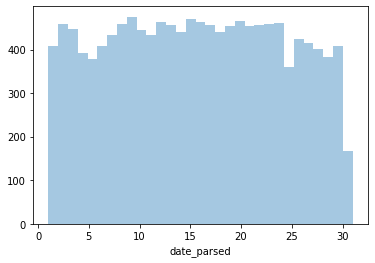

In [10]:
# remove na's
day_of_month_df1 = day_of_month_df1.dropna()

# plot the day of the month
sb.distplot(day_of_month_df1, kde=False, bins=31)